# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?"
data = requests.get(url + "appid=" + weather_api_key + "&q=" + cities[1] + '&units=metric').json()
print(data['dt'])
data

1698276873


{'coord': {'lon': -159.378, 'lat': 22.0669},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 27.23,
  'feels_like': 29.16,
  'temp_min': 26.44,
  'temp_max': 27.29,
  'pressure': 1016,
  'humidity': 69},
 'visibility': 10000,
 'wind': {'speed': 4.63, 'deg': 160},
 'clouds': {'all': 100},
 'dt': 1698276873,
 'sys': {'type': 2,
  'id': 2039329,
  'country': 'US',
  'sunrise': 1698251867,
  'sunset': 1698293107},
 'timezone': -36000,
 'id': 7262802,
 'name': 'Wailua Homesteads',
 'cod': 200}

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chibougamau
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | puerto aysen
Processing Record 4 of Set 1 | gamba
Processing Record 5 of Set 1 | hinton
Processing Record 6 of Set 1 | egilsstadir
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | havre
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | waingapu
Processing Record 11 of Set 1 | callao
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | nikolayevsk-on-amure
Processing Record 14 of Set 1 | crane
Processing Record 15 of Set 1 | mtambile
Processing Record 16 of Set 1 | broken hill
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | uvinza
Processing Record 20 of Set 1 | kingston
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Set 1 | port alfred
Processin

Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | taiohae
City not found. Skipping...
Processing Record 43 of Set 4 | spring creek
Processing Record 44 of Set 4 | longyearbyen
Processing Record 45 of Set 4 | ha'il
Processing Record 46 of Set 4 | utrik
Processing Record 47 of Set 4 | saipan
Processing Record 48 of Set 4 | acarau
Processing Record 49 of Set 4 | hermanus
Processing Record 0 of Set 5 | whakatane
Processing Record 1 of Set 5 | benghazi
Processing Record 2 of Set 5 | anna regina
Processing Record 3 of Set 5 | comodoro rivadavia
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | kerikeri
Processing Record 6 of Set 5 | la passe
Processing Record 7 of Set 5 | gaigeturi
Processing Record 8 of Set 5 | vila franca do campo
Processing Record 9 of Set 5 | queenstown
Processing Record 10 of Set 5 | anadyr
Processing Record 11 of Set 5 | luderitz
Processing Record 12 of Set 5 | sinop
Processing Record 13 of Set 5 | sorong
Processing Record 14 o

Processing Record 32 of Set 8 | yanchep
Processing Record 33 of Set 8 | totskoye
Processing Record 34 of Set 8 | strelka
Processing Record 35 of Set 8 | vanino
Processing Record 36 of Set 8 | broome
Processing Record 37 of Set 8 | troitsko-pechorsk
Processing Record 38 of Set 8 | bahar
Processing Record 39 of Set 8 | misratah
Processing Record 40 of Set 8 | manokwari
Processing Record 41 of Set 8 | tuy hoa
Processing Record 42 of Set 8 | apac
Processing Record 43 of Set 8 | puerto lempira
Processing Record 44 of Set 8 | horta
Processing Record 45 of Set 8 | mirnyy
Processing Record 46 of Set 8 | tara
Processing Record 47 of Set 8 | constitucion
Processing Record 48 of Set 8 | rongelap
Processing Record 49 of Set 8 | nemuro
Processing Record 0 of Set 9 | nejo
Processing Record 1 of Set 9 | wanning
Processing Record 2 of Set 9 | pudasjarvi
Processing Record 3 of Set 9 | daru
Processing Record 4 of Set 9 | belen
Processing Record 5 of Set 9 | mezhdurechenskiy
Processing Record 6 of Set 9 

Processing Record 22 of Set 12 | kyelang
Processing Record 23 of Set 12 | ta`u
Processing Record 24 of Set 12 | kourou
Processing Record 25 of Set 12 | saratamata
City not found. Skipping...
Processing Record 26 of Set 12 | bodo
Processing Record 27 of Set 12 | severo-yeniseyskiy
Processing Record 28 of Set 12 | morondava
Processing Record 29 of Set 12 | arteche
Processing Record 30 of Set 12 | remire-montjoly
Processing Record 31 of Set 12 | son ferrer
City not found. Skipping...
Processing Record 32 of Set 12 | nikolayevsk
Processing Record 33 of Set 12 | senanga
Processing Record 34 of Set 12 | mandera
Processing Record 35 of Set 12 | rodolfo sanchez taboada
Processing Record 36 of Set 12 | quatre cocos
Processing Record 37 of Set 12 | katsuura
Processing Record 38 of Set 12 | diu
Processing Record 39 of Set 12 | tanaina
Processing Record 40 of Set 12 | tallinn
Processing Record 41 of Set 12 | inverloch
Processing Record 42 of Set 12 | pekan
Processing Record 43 of Set 12 | bandar-e

In [27]:
df = pd.DataFrame(city_data)
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chibougamau,49.9168,-74.3659,7.79,93,100,3.09,CA,1698276348
1,wailua homesteads,22.0669,-159.3780,27.29,69,100,4.63,US,1698276873
2,puerto aysen,-45.4000,-72.7000,8.46,94,100,2.65,CL,1698276979
3,gamba,-2.6500,10.0000,23.60,92,100,2.04,GA,1698276979
4,hinton,53.4001,-117.5857,-5.14,71,23,1.39,CA,1698276979
...,...,...,...,...,...,...,...,...,...
572,piacabucu,-10.4056,-36.4344,25.32,80,8,8.07,BR,1698277068
573,xinghua,32.9392,119.8342,19.84,62,2,1.69,CN,1698277068
574,merizo village,13.2658,144.6691,30.55,86,98,3.45,GU,1698277069
575,molina,-35.1167,-71.2833,20.85,37,0,3.60,CL,1698277069


In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chibougamau,49.9168,-74.3659,7.79,93,100,3.09,CA,1698276348
1,wailua homesteads,22.0669,-159.3780,27.29,69,100,4.63,US,1698276873
2,puerto aysen,-45.4000,-72.7000,8.46,94,100,2.65,CL,1698276979
3,gamba,-2.6500,10.0000,23.60,92,100,2.04,GA,1698276979
4,hinton,53.4001,-117.5857,-5.14,71,23,1.39,CA,1698276979


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chibougamau,49.9168,-74.3659,7.79,93,100,3.09,CA,1698276348
1,wailua homesteads,22.0669,-159.3780,27.29,69,100,4.63,US,1698276873
2,puerto aysen,-45.4000,-72.7000,8.46,94,100,2.65,CL,1698276979
3,gamba,-2.6500,10.0000,23.60,92,100,2.04,GA,1698276979
4,hinton,53.4001,-117.5857,-5.14,71,23,1.39,CA,1698276979


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

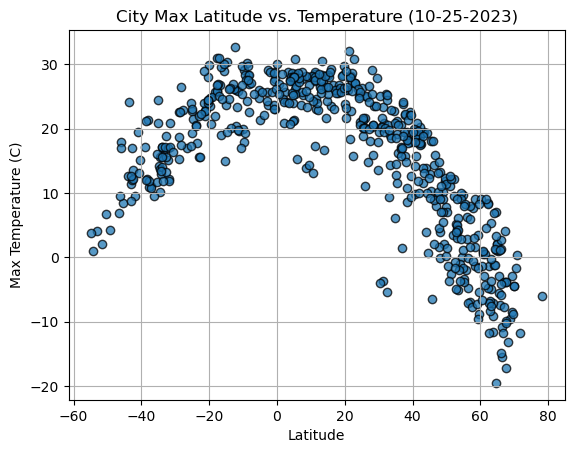

In [60]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

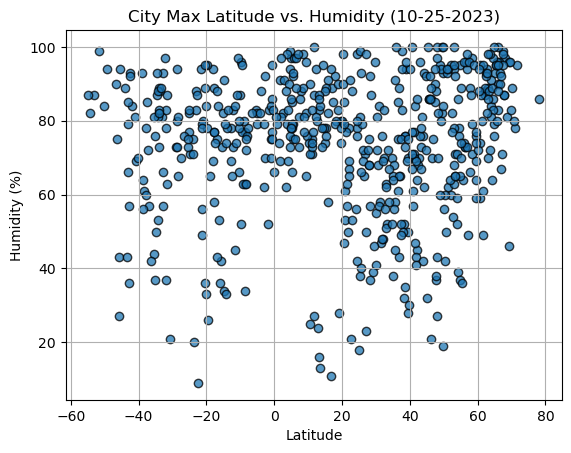

In [61]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

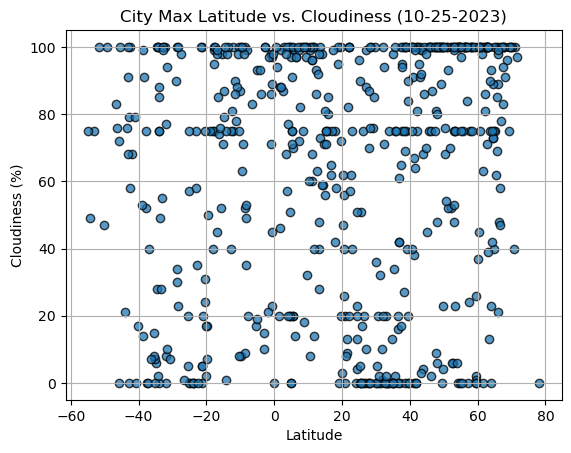

In [62]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

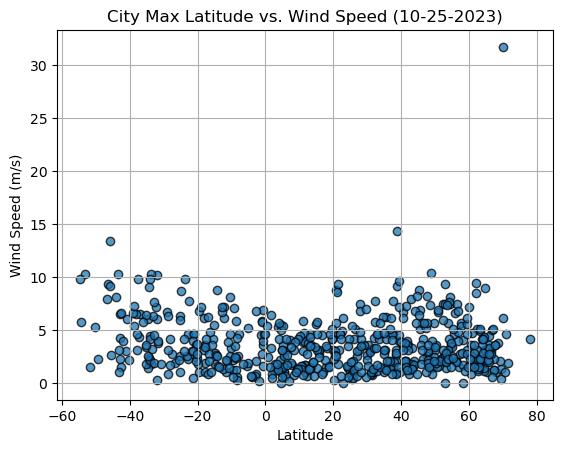

In [64]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.grid(True)
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.title(f"City Max Latitude vs. Wind Speed ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [66]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chibougamau,49.9168,-74.3659,7.79,93,100,3.09,CA,1698276348
1,wailua homesteads,22.0669,-159.3780,27.29,69,100,4.63,US,1698276873
4,hinton,53.4001,-117.5857,-5.14,71,23,1.39,CA,1698276979
5,egilsstadir,65.2653,-14.3948,0.95,93,75,1.03,IS,1698276979
7,havre,49.5833,0.3333,11.87,82,0,2.06,FR,1698276980


In [70]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto aysen,-45.4000,-72.7000,8.46,94,100,2.65,CL,1698276979
3,gamba,-2.6500,10.0000,23.60,92,100,2.04,GA,1698276979
6,waitangi,-43.9535,-176.5597,12.71,89,21,8.08,NZ,1698276980
8,invercargill,-46.4000,168.3500,9.45,75,76,9.39,NZ,1698276980
9,waingapu,-9.6567,120.2641,29.11,52,8,1.25,ID,1698276980


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7563282370764975


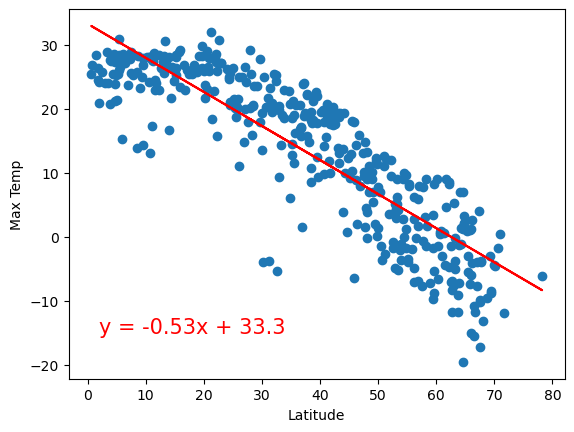

In [92]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,-15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6485795615647424


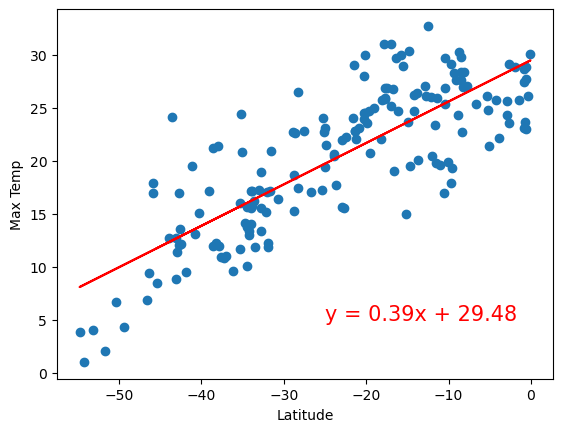

In [93]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The max temperature increases as the latitude gets closer to 0, so the more negative or positive the latitude the colder the max temperature is and the closer the latitude is to 0 (the equator) the hotter the max temperature for both the northern and southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.010077159592886168


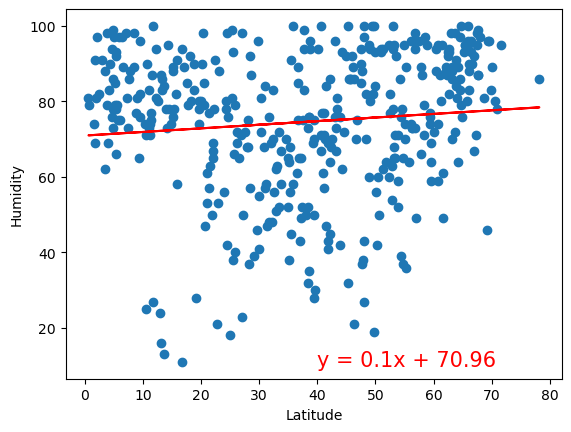

In [100]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 7.138948712725354e-05


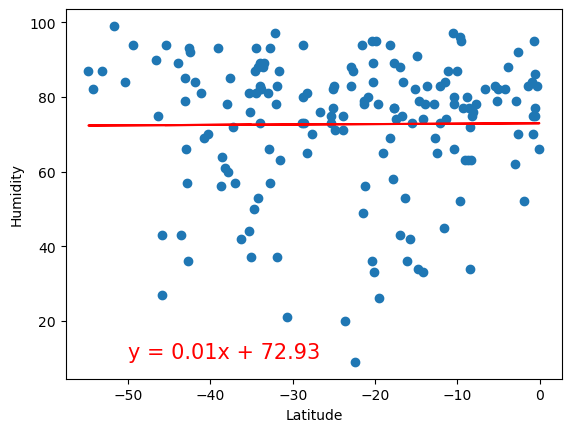

In [103]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


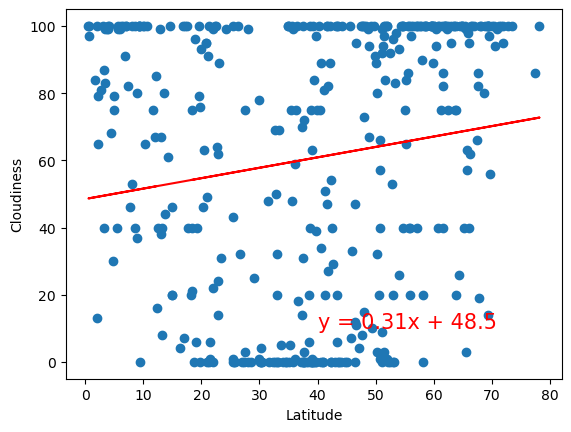

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,-15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.02056735429994368


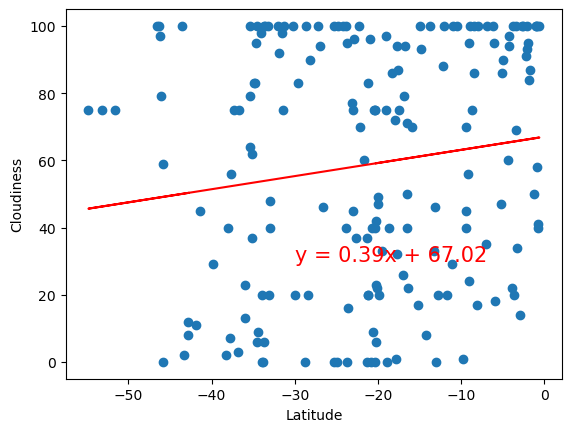

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


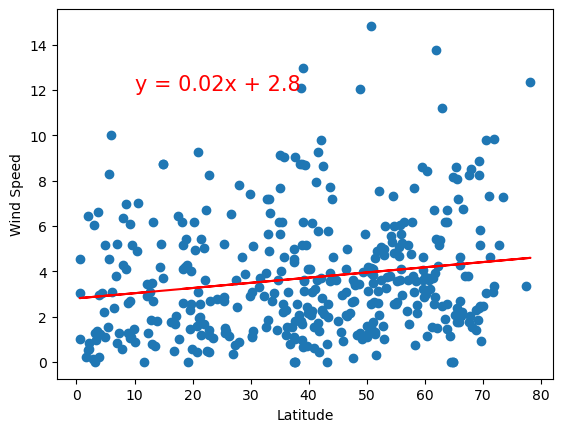

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,-15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.062239040700515696


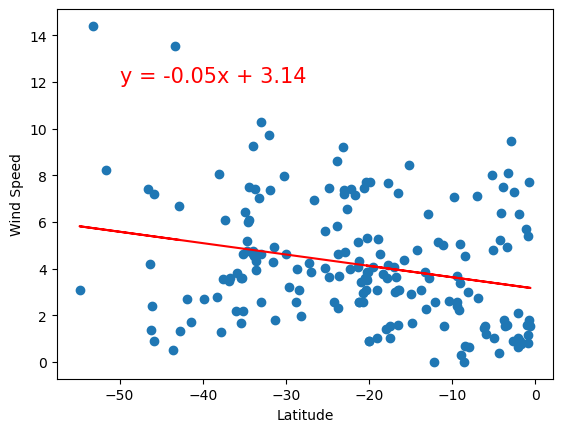

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE